In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
import streamlit 
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve  # Metrics and curves
from sklearn.decomposition import PCA



In [2]:
#1.Load Dataset

df=pd.read_csv(r"C:\Users\Zeinab\Desktop\My Python\Deploy\Football Injuries/data.csv")

df.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


In [3]:
#2.Analyzing the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    int64  
 1   Height_cm                   800 non-null    int64  
 2   Weight_kg                   800 non-null    int64  
 3   Position                    800 non-null    object 
 4   Training_Hours_Per_Week     800 non-null    float64
 5   Matches_Played_Past_Season  800 non-null    int64  
 6   Previous_Injury_Count       800 non-null    int64  
 7   Knee_Strength_Score         800 non-null    float64
 8   Hamstring_Flexibility       800 non-null    float64
 9   Reaction_Time_ms            800 non-null    float64
 10  Balance_Test_Score          800 non-null    float64
 11  Sprint_Speed_10m_s          800 non-null    float64
 12  Agility_Score               800 non-null    float64
 13  Sleep_Hours_Per_Night       800 non

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,800.0,21.135000,1.991037,18.000000,19.000000,21.000000,23.000000,24.000000
Height_cm,800.0,177.407500,7.148974,154.000000,173.000000,177.000000,182.000000,200.000000
Weight_kg,800.0,73.235000,9.929276,45.000000,66.000000,73.000000,80.000000,105.000000
Training_Hours_Per_Week,800.0,9.951150,2.610395,5.000000,8.127151,9.895710,11.535140,18.866608
Matches_Played_Past_Season,800.0,22.332500,10.311516,5.000000,13.000000,22.000000,32.000000,39.000000
Previous_Injury_Count,800.0,1.536250,1.292584,0.000000,1.000000,1.000000,2.000000,8.000000
Knee_Strength_Score,800.0,74.933249,6.672704,52.391351,70.432656,74.997933,79.632391,93.900051
Hamstring_Flexibility,800.0,79.154123,6.782332,58.180381,74.495959,79.187909,83.813179,100.000000
Reaction_Time_ms,800.0,249.423244,22.532387,180.000000,234.089585,249.127328,265.105082,306.730851
Balance_Test_Score,800.0,83.832337,6.931657,60.059484,79.044910,84.156236,88.877902,100.000000


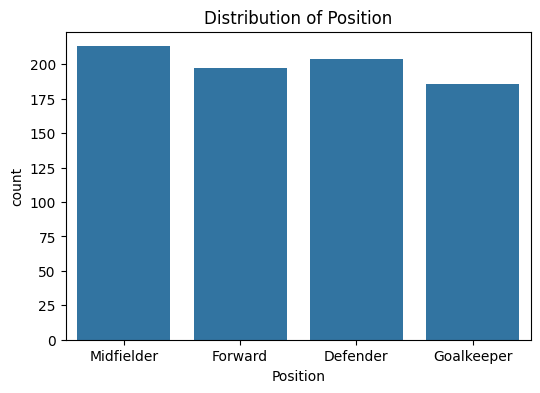

In [5]:
#3. Data Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Position', data=df)
plt.title('Distribution of Position')
plt.show()

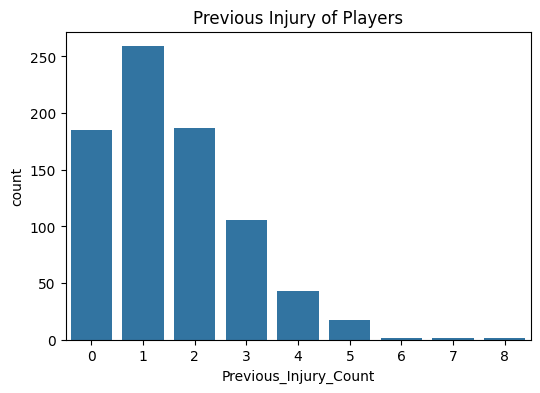

In [6]:
# Previous Injury of Players
plt.figure(figsize=(6,4))
sns.countplot(x='Previous_Injury_Count', data=df)
plt.title('Previous Injury of Players')
plt.show()

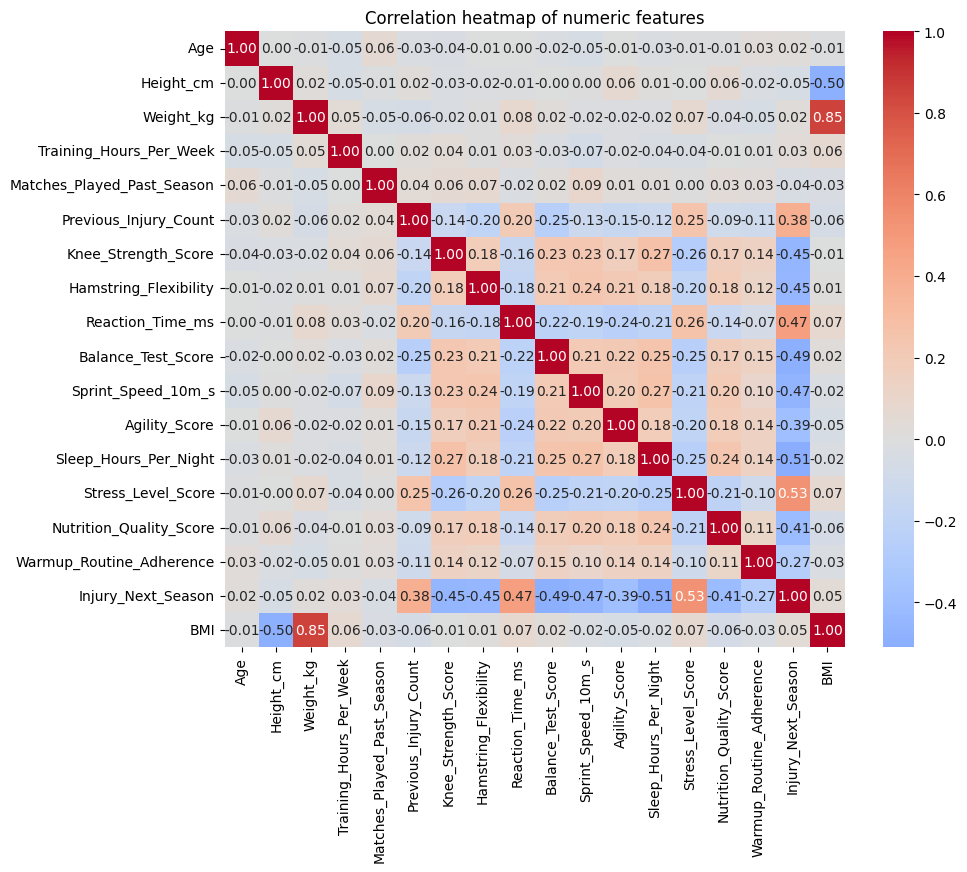

In [7]:
# 4. Correlation heatmap (numeric features only)
numeric = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,8))
sns.heatmap(numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation heatmap of numeric features')
plt.show()

# In this heatmap we can see that Age,Height,Weight,Training Hours and Last Season, 
# Matches aren't important for our dataset so we won't use these and we will drop these columns on preprocessing.

In [8]:
le = LabelEncoder()
df["Position"] = le.fit_transform(df["Position"])

df.head(5)

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,3,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,0,21.383942
1,18,170,67,3,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,0,23.183391
2,22,186,75,1,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,1,21.678807
3,20,172,62,0,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,0,20.957274
4,18,172,94,3,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,1,31.773932


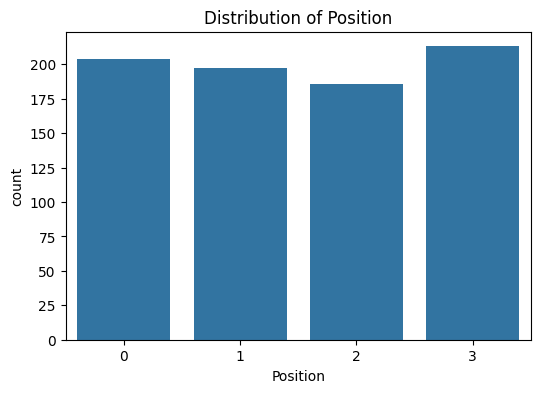

In [9]:
#3. Data Visualization after encoding
plt.figure(figsize=(6,4))
sns.countplot(x='Position', data=df)
plt.title('Distribution of Position')
plt.show()

In [10]:
y = df["Injury_Next_Season"]
X = df.drop(["Injury_Next_Season"], axis=1)

X_train, X_test,y_train,y_test=train_test_split(X,y,random_state=42,train_size=0.85)
print("Dataset loaded. X shape:", X.shape, "; y length:", len(y))

Dataset loaded. X shape: (800, 18) ; y length: 800


In [11]:
# 4. Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc:.5f}')

Accuracy Score: 0.94167


In [12]:
# Make predictions
y_pred = model.predict(X_test) 

In [13]:
# Classification Report
print("Classification Report:")  # Header
print(classification_report(y_test, y_pred))  # Precision, recall, f1-score by class

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        61
           1       0.92      0.97      0.94        59

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



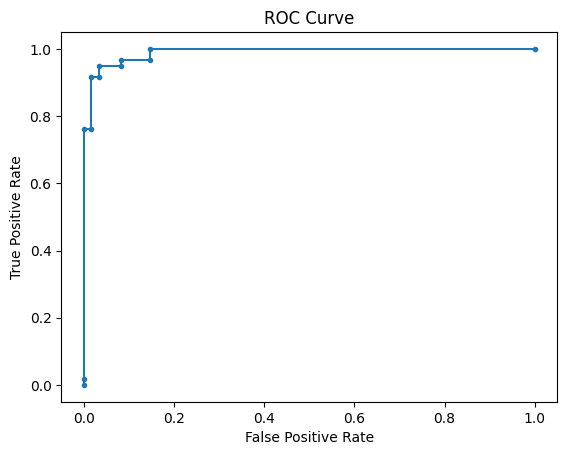

AUC Score: 0.99


In [14]:
# ROC Curve and AUC Score
y_prob = model.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_prob)  
plt.plot(fpr, tpr, marker='.')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')  
plt.show()  

auc_score = roc_auc_score(y_test, y_prob)  
print(f"AUC Score: {auc_score:.2f}") 

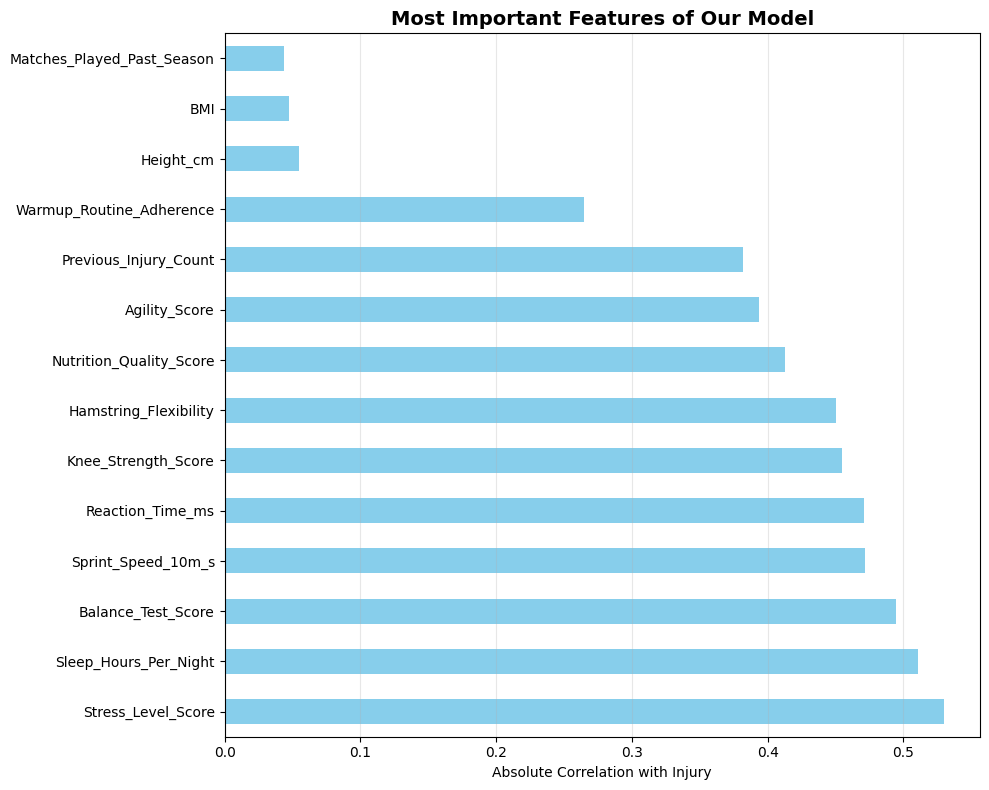

Top correlated features with Injury:
----------------------------------------
Stress_Level_Score  : 0.5300
Sleep_Hours_Per_Night: 0.5109
Balance_Test_Score  : 0.4948
Sprint_Speed_10m_s  : 0.4715
Reaction_Time_ms    : 0.4709
Knee_Strength_Score : 0.4546
Hamstring_Flexibility: 0.4503
Nutrition_Quality_Score: 0.4125
Agility_Score       : 0.3937
Previous_Injury_Count: 0.3822
Warmup_Routine_Adherence: 0.2651
Height_cm           : 0.0549
BMI                 : 0.0474
Matches_Played_Past_Season: 0.0439


In [15]:
# Calculate correlations with target (Accident)
correlations = df.select_dtypes(include=[np.number]).corr()["Injury_Next_Season"].abs().sort_values(ascending=False)

# Top 15 correlated features
top_corr_features = correlations.head(15)

# Plot
plt.figure(figsize=(10, 8))
top_corr_features.drop("Injury_Next_Season").plot(kind="barh", color="skyblue")
plt.title("Most Important Features of Our Model", fontsize=14, fontweight="bold")
plt.xlabel("Absolute Correlation with Injury")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

# Print correlation values
print("Top correlated features with Injury:")
print("-" * 40)
for feature, corr in top_corr_features.items():
    if feature != "Injury_Next_Season":
        print(f"{feature:<20}: {corr:.4f}")

In [16]:
# Apply PCA
pca = PCA(n_components=0.95)  # keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [17]:
# Random forrest 
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_pca, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
# Predict probabilities (injury risk %)
y_pred_proba = rf.predict_proba(X_test_pca)[:, 1]
y_pred_percent = (y_pred_proba * 100).round(2)

In [19]:
# Show predictions with risk %
results = X_test.copy()
results["Actual_Injury"] = y_test.values
results["Predicted_Risk_%"] = y_pred_percent
results.head(20)

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,BMI,Actual_Injury,Predicted_Risk_%
696,20,177,83,0,11.651417,21,2,72.961965,76.010591,250.239484,84.437347,5.809211,74.922934,7.026939,61.906446,86.943814,1,26.493026,1,56.5
667,23,183,74,1,10.679324,17,0,72.749380,83.240448,239.586454,83.229296,5.485104,65.473997,7.133319,64.484729,75.227116,0,22.096808,1,70.0
63,20,183,76,2,9.999682,10,3,71.268829,71.034240,266.125782,85.041696,5.768755,83.852043,6.996332,48.937422,70.744827,0,22.694019,1,76.0
533,20,169,73,2,8.122849,10,2,79.070492,90.636618,255.957157,88.544164,6.323186,82.042122,8.418339,60.147325,86.586818,1,25.559329,0,27.0
66,24,183,71,1,5.801271,37,3,64.023593,78.797275,275.453325,72.062097,5.623286,67.946307,7.650424,64.848743,69.549424,0,21.200991,1,97.5
621,22,173,74,2,13.383428,12,1,73.748107,71.549882,243.992805,87.059195,5.107489,80.527579,6.363196,34.702365,64.781849,0,24.725183,1,16.0
346,24,187,56,2,6.580434,39,2,79.950460,82.971954,246.599613,84.775941,6.684941,76.904493,8.384004,49.828362,67.348338,1,16.014184,0,14.0
490,24,180,75,3,10.580934,38,5,77.483054,86.029007,257.842552,68.573588,5.963899,88.008946,6.537876,53.364312,67.688641,1,23.148148,1,72.0
760,20,172,66,0,9.437400,7,1,73.373251,84.751998,201.558972,83.115706,5.932807,79.884785,7.913825,48.321563,73.218244,0,22.309356,0,40.0
456,21,179,78,2,9.841467,24,1,68.786278,76.352052,259.579853,80.764235,5.848409,72.901843,6.803516,75.646328,85.164042,0,24.343809,1,86.0


In [20]:
#Sort players by risk descending
results_sorted = results.sort_values("Predicted_Risk_%", ascending=False).reset_index(drop=True)

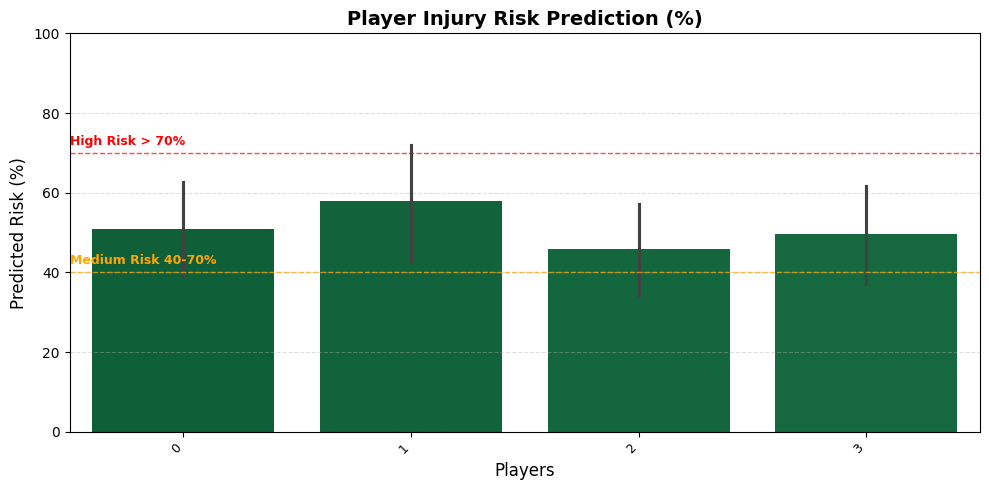

In [21]:
# Simplify and clarify data
results_sorted = results.sort_values("Predicted_Risk_%", ascending=False).reset_index(drop=True)

# Optional: if you still have player names or positions, use them for labels
player_labels = results_sorted["Position"] if "Position" in results_sorted.columns else results_sorted.index

# =====================
# Create simple and informative plot
# =====================
plt.figure(figsize=(10,5))
sns.barplot(
    x=player_labels,
    y=results_sorted["Predicted_Risk_%"],
    palette=sns.color_palette("RdYlGn_r", len(results_sorted))
)

# =====================
# Improve readability
# =====================
plt.title("Player Injury Risk Prediction (%)", fontsize=14, fontweight="bold")
plt.ylabel("Predicted Risk (%)", fontsize=12)
plt.xlabel("Players", fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Highlight thresholds visually
plt.axhline(70, color='red', linestyle='--', linewidth=1, alpha=0.7)
plt.axhline(40, color='orange', linestyle='--', linewidth=1, alpha=0.7)
plt.text(-0.5, 72, 'High Risk > 70%', color='red', fontsize=9, fontweight='bold')
plt.text(-0.5, 42, 'Medium Risk 40-70%', color='orange', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()
